In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import skimage as skm

import skimage.morphology as mrph

import os
import imageio

import os
img_list = sorted(os.listdir('images/'))
img_list

path = '/home/epsilon/jupyter-notebook/diatom_morphogenesis/1.PNAS/image_analysis/images/'
valves_list =[]

# loop over images in folder
for i, j in enumerate(img_list,0):
    img_buffer = skm.color.rgb2gray(skm.io.imread(path+img_list[i]))
    valves_list.append(img_buffer)
#img_list

In [2]:
print(skm.__version__)

0.15.0


In [2]:
# load magnification factor [pixel/um]
mag_fac = np.loadtxt('magnifications.txt', delimiter = ',',usecols =(1), skiprows=1)
len(mag_fac)

38

In [4]:
def plot_scale_bar(img,mgf,axes):
    im1 = axes.errorbar(np.shape(img)[0]*0.9,np.shape(img)[1]*0.08,\
                        xerr = (mgf*down_scale)/4, color='k', capsize=1,linewidth=2)
    im2 = axes.text(np.shape(img)[0]*0.9,np.shape(img)[1]*0.025,\
                   '500 nm', horizontalalignment='center', verticalalignment='top',fontsize = 10)
    
    return(im1,im2)

In [5]:
import local_thresholding as loc_th
img_n = 6
down_scale = 0.8
from skimage.transform import rescale
orig_img = rescale(valves_list[img_n], down_scale, anti_aliasing=True,multichannel=False)
ske_exp = loc_th.skeletonize_TEM_GS(valves_list[img_n],mag_fac[img_n],down_scale)
ske_pr = loc_th.prune_skeleton(ske_exp,mag_fac[img_n],down_scale)

(-0.5, 705.5, 702.5, -0.5)

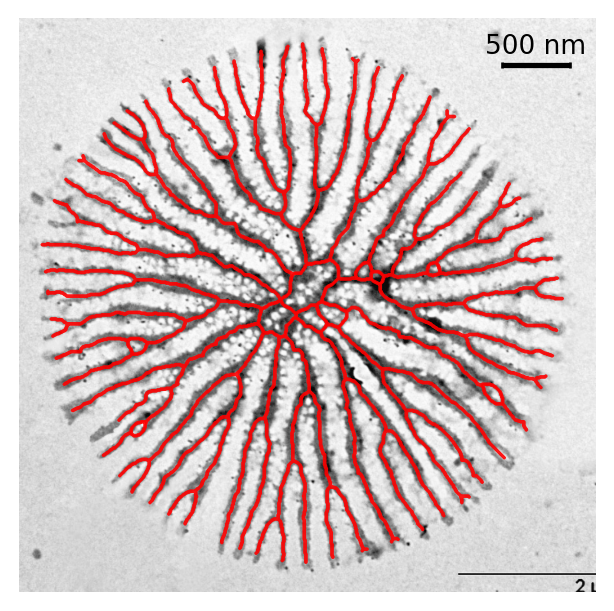

In [6]:
fig, ax = plt.subplots(figsize=(5,4),dpi=190)
ax = plt.subplot(111)

im = ax.imshow(orig_img,cmap='Greys_r')
ax.contour(ske_pr, [0.2], colors=['r'],linewidths = 0.9, alpha=0.9)

plot_scale_bar(orig_img,mag_fac[img_n],ax)
# plt.axis('off')

In [ ]:
# save skeletons
for i in range(len(mag_fac)):
    img_n = i
    from skimage.transform import rescale
    orig_img = rescale(valves_list[img_n], down_scale, anti_aliasing=True)
    ske_exp = loc_th.skeletonize_TEM_GS(valves_list[img_n],mag_fac[img_n],down_scale)
    ske_pr = loc_th.prune_skeleton(ske_exp,mag_fac[img_n],down_scale)
    ske_pr = 1*(ske_pr>0)
      
    np.savetxt('skel_0{}.txt'.format(i),ske_pr,fmt='%.2f')